In [1]:
import requests as req
import random

api = 'https://kawal-c1.appspot.com/api/c/' # alamat API

def getRandomTPSElectionData(id='0'):
  addr = api + str(id)
  rslt = req.get(addr)
  if rslt.status_code == req.codes.ok:
    data = rslt.json()
    if data['depth'] < 4:
      children = list(data['children'])
      selected_child = random.choice(children)
      next_id = selected_child[0]
      if next_id == -99: # exclude oversea polling stations for the sake shorter LOC
        return False  
      return getRandomTPSElectionData(next_id)
    else:
      try:
        tps_list = list(data['data'])
        selected_tps = random.choice(tps_list)
        no_tps = selected_tps[0]
        summary = data['data'][no_tps]['sum']
        tpsid = '-'.join(data['parentNames'])+ data['name']+'- TPS NO '+no_tps
        pas1 = summary['pas1']
        pas2 = summary['pas2']
        tsah = summary['tSah']
        return tpsid,pas1,pas2,tsah
      except Exception as e:
        # error caused by non existent/non complete data
        return False

In [11]:
# retrieve samples
sample_size = 100
sample_cnt = 0
samples = []

while sample_cnt < sample_size:
  rslt = getRandomTPSElectionData()   
  if rslt!=False:
    sample_cnt += 1
    samples.append(rslt)


In [7]:
# print summary
pas01 = sum([tps[1] for tps in samples])
pas02 = sum([tps[2] for tps in samples])
tdk_sah = sum([tps[3] for tps in samples])
total = pas01 + pas02

pas01pct = round(pas01 / total * 100, 2)
pas02pct = round(pas02 / total * 100, 2)

print('Perolehan suara dari sampel {} tps'.format(sample_cnt))
print('Pasangan 01 {} / {}% suara'.format(pas01,pas01pct))
print('Pasangan 02 {} / {}% suara'.format(pas02,pas02pct))
print('Total suara={}, suara tidak sah={}'.format(total,tdk_sah))

Perolehan suara dari sampel 10 tps
Pasangan 01 958 / 56.42% suara
Pasangan 02 740 / 43.58% suara
Total suara=1698, suara tidak sah=32


<IPython.core.display.Javascript object>


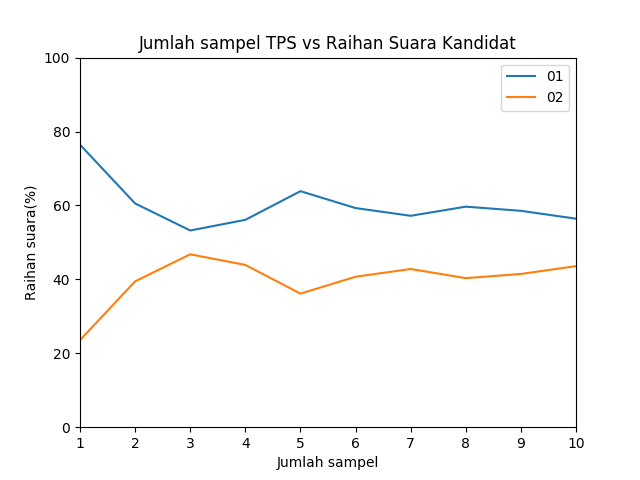

In [10]:
# plot data sample size vs pct of vote for each candidate
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

scnt = range(1,len(samples)+1)
pct01 = []
pct02 = []
pctts = []
v01=0
v02=0
for s in samples:
    v01 += s[1]
    v02 += s[2]
    tot = v01 + v02
    pct01.append(round(v01/tot * 100,2))
    pct02.append(round(v02/tot * 100,2))

fig, ax = plt.subplots()
plt.title('Jumlah sampel TPS vs Raihan Suara Kandidat')
plt.ylabel('Raihan suara(%)')
plt.xlabel('Jumlah sampel')

ax.axis([1, len(samples), 0, 100])
ax.plot(scnt,pct01,label='01')
ax.plot(scnt,pct02,label='02')

ax.legend()
    